# Data Analytics and Big Data

## 5. Ciencia de Datos con Python

### Task 3. Construcción y Evaluación de Modelos

#### Introducción

Una vez explorado los datos de forma adecuada, se continúa con el proceso de modelado. Durante esta tarea, se construyen modelos de clasificación con tres tipos de algoritmos distintos, mediante el uso del módulo de Sci-Kit Learn. Finalmente, se comparan los resultados de cada uno de ellos, con el fin de brindar la solución con mejor rendimiento a la empresa.

#### Preparación de los Datos

##### Limpieza y pre-procesamiento

Inicialmente, se importan los modulos necesarios para la realización del proyecto

In [1]:
# imports
# numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

# estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# model metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score

# cross validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#PCA
from sklearn.decomposition import PCA

Se importa el conjuto de datos de CreditOne y, se procede a eliminar los atributos que no presentarán algún beneficio o no ofrece aporte alguno en nuestro proyecto, como es el caso del atributo *ID*. Además, con el fin de evitar problemas en el futuro por el tema de discriminación, se elimina el atributo *SEX*. Con el fin de remover dichas columnas, se utiliza la función drop(), que permite remover columnas del conjunto de datos.

In [2]:
# data
rawData = pd.read_csv('default of credit card clients.csv', header = 1)

In [3]:
rawData = rawData.drop(columns = ['ID','SEX'])
rawData.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Examinando la estructura de los datos y verificando que se importaron en el formato correcto:

In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   EDUCATION                   30000 non-null  int64
 2   MARRIAGE                    30000 non-null  int64
 3   AGE                         30000 non-null  int64
 4   PAY_0                       30000 non-null  int64
 5   PAY_2                       30000 non-null  int64
 6   PAY_3                       30000 non-null  int64
 7   PAY_4                       30000 non-null  int64
 8   PAY_5                       30000 non-null  int64
 9   PAY_6                       30000 non-null  int64
 10  BILL_AMT1                   30000 non-null  int64
 11  BILL_AMT2                   30000 non-null  int64
 12  BILL_AMT3                   30000 non-null  int64
 13  BILL_AMT4                   30000 non-null  int64
 14  BILL_A

Se procede a cambiar el tipo de variable, a nominal o categórica, en los siguientes atributos: *EDUCATION*, *MARRIAGE*, *PAY_0*, *PAY_2*, *PAY_3*, *PAY_4*, *PAY_5*, *PAY_6* y *default payment next month*.

In [5]:
rawData = rawData.astype({'EDUCATION': 'category',
                          'MARRIAGE': 'category',
                          'PAY_0': 'category',
                          'PAY_2': 'category',
                          'PAY_3': 'category',
                          'PAY_4': 'category',
                          'PAY_5': 'category',
                          'PAY_6': 'category',
                          'default payment next month': 'category'})
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   30000 non-null  int64   
 1   EDUCATION                   30000 non-null  category
 2   MARRIAGE                    30000 non-null  category
 3   AGE                         30000 non-null  int64   
 4   PAY_0                       30000 non-null  category
 5   PAY_2                       30000 non-null  category
 6   PAY_3                       30000 non-null  category
 7   PAY_4                       30000 non-null  category
 8   PAY_5                       30000 non-null  category
 9   PAY_6                       30000 non-null  category
 10  BILL_AMT1                   30000 non-null  int64   
 11  BILL_AMT2                   30000 non-null  int64   
 12  BILL_AMT3                   30000 non-null  int64   
 13  BILL_AMT4       

En algunas ocasiones es necesario discretizar los datos continuos; es decir, colocar los valores de los atributos en depósitos para que exista un número limitado de estados posibles, los cuales son tratados como si fueran valores ordenados y discretos. Para los datos a disposición, se decide discretizar el atributo *AGE* en 4 depósitos, que abarca lo siguiente:

   - Young adults (1): 15 a 29 años.
   - Adults (2): 30 a 44 años.
   - Middle-aged adults (3): 45 a 59 años.
   - Older adults (4): 60 a 99 años.

El otro atributo modificao es *LIMIT_BAL* en 10 depósitos, con límites cada $100 000, a excepción del último depósito que abarca préstamos muy elevados ya que son muy pocos. La función *pd.cut()* de la biblioteca Pandas permite segmentar los valores de los datos en dichos depósitos.

In [6]:
rawData['LIMIT_BAL'] = pd.cut(x = rawData['LIMIT_BAL'],
                                   bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 100000000],
                                   labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

In [7]:
rawData['AGE'] = pd.cut(x = rawData['AGE'],
                             bins = [15, 30, 45, 60, 99],
                             labels = ['1', '2', '3', '4'])

In [8]:
rawData.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,2,1,1,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,2,2,2,1,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,1,2,2,2,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,1,2,1,2,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,2,1,3,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Con la preparación de datos realizada, es posible continuar con la selección de los datos.

##### Seleccionando los Datos y Aplicando PCA

A continuación, se procede a seleccionar las características y la variable dependiente.

In [9]:
#features
features_noAMT = rawData.iloc[:,0:10]
print('Summary of feature sample')
features_noAMT.head()

Summary of feature sample


,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1,2,1,1,2,2,-1,-1,-2,-2
1,2,2,2,1,-1,2,0,0,0,2
2,1,2,2,2,0,0,0,0,0,0
3,1,2,1,2,0,0,0,0,0,0
4,1,2,1,3,-1,0,-1,0,0,0


Luego, se selecciona la variable dependiente:

In [10]:
#dependent variable
depVar = rawData['default payment next month']

Se procede a utilizar PCA (Principal Component Analysis) con el fin de reducir la dimensionalidad sin reducir el número de atributos en los datos. Éste análisis es aplicado solamente a los atributos numéricos, con el fin de reducir la dimensionalidad.

In [11]:
#features
features_AMT = rawData.iloc[:,10:22]
print('Summary of feature sample')
features_AMT.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


Se decide utilizar un mínimo de número de componentes principales que contengan al menos un 95% de la varianza.

In [12]:
# Make an instance of the Model
pca = PCA(.95)

#Fit
pca.fit(features_AMT)

#Transform
features_AMT = pca.transform(features_AMT)

In [13]:
features_AMT_df = pd.DataFrame(features_AMT, columns=['PC0','PC1','PC2','PC3','PC4'])
features_AMT_df.head()

,PC0,PC1,PC2,PC3,PC4
0,-107827.409966,-3025.439711,-2537.615934,-5200.241638,753.913654
1,-104308.440916,2234.471987,-2169.571005,-5041.338555,-176.868674
2,-69249.080182,-3943.555618,-6142.775843,721.904414,1293.421049
3,-15282.889849,-12499.864895,2093.716319,-7442.442119,6520.041355
4,-65854.717174,22834.675392,32156.249549,62.822480,7334.363250


Se obtienen 5 componentes principales que representan el 95% de la varianza. A continuación, se concatenan los atributos y las componentes principales.

In [14]:
features = pd.concat([features_noAMT,features_AMT_df], axis = 1)
features.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PC0,PC1,PC2,PC3,PC4
0,1,2,1,1,2,2,-1,-1,-2,-2,-107827.409966,-3025.439711,-2537.615934,-5200.241638,753.913654
1,2,2,2,1,-1,2,0,0,0,2,-104308.440916,2234.471987,-2169.571005,-5041.338555,-176.868674
2,1,2,2,2,0,0,0,0,0,0,-69249.080182,-3943.555618,-6142.775843,721.904414,1293.421049
3,1,2,1,2,0,0,0,0,0,0,-15282.889849,-12499.864895,2093.716319,-7442.442119,6520.041355
4,1,2,1,3,-1,0,-1,0,0,0,-65854.717174,22834.675392,32156.249549,62.822480,7334.363250


El conjunto de entrenamiento se divide en dos partes, un conjunto para las características (variables independientes) y un conjunto relacionado para los resultados (variable dependiente). Ambos deben coincidir con el tamaño de la división, en éste caso de 70% de los datos.

Los datos de prueba siguen las mismas reglas y contienen dos conjuntos, uno para las características o variables independientes y otro para el atributo de *ground truth* (y_test), que se utiliza para comparar las predicciones. En éste caso, los datos de prueba se componen de los datos, el 30% restante de los datos.

Se puede realizar la validación cruzada mediante sklearn.cross_validation en los conjuntos de datos de la siguiente manera:

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size = 0.30, random_state=0)
X_train.shape, X_test.shape

((21000, 15), (9000, 15))

#### Construyendo los Modelos y Eligiendo el Modelo con Mejor Rendimiento

En esta sección se crean tres modelos de clasificación y para seleccionar el adecuado de acuerdo a las necesidades de la empresa.

Inicialmente, se establecen variables que se utilizarán para definir cada modelo, como se muestra a continuación:

In [16]:
#Models
modelKNN = KNeighborsClassifier(n_neighbors=10, weights='uniform')
modelSVM = SVC(kernel='rbf', gamma='scale')
modelRF = RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=10, criterion='gini')

Se procede a verificar si se seleccionó de forma correcta la variable dependiente, en este caso debería ser *default payment next month*

In [17]:
#dependent variable
print(depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: category
Categories (2, int64): [0, 1]


A continuación, se transfiere los datos de entrenamiento a todos los modelos que se construirán utilizando las variables de modelo que se crearon anteriormente.

In [18]:
#Random Forest Classifier
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=10, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [19]:
#K-Nearest Neighbors (KNN)
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [20]:
#Support Vector Machine Classifier (SVM)
modelSVM.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Seleccionando el Modelo Correcto

En la mayoría de los casos es necesario la construcción de más de un modelo para encontrar el más apropiado para el trabajo. Sci-Kit Learn tiene una función que 'puntuará' la adecuación de cada modelo según el algoritmo utilizado para construirlo; los modelos con los puntajes más altos deben usarse para hacer predicciones. La métrica que usaremos para verificar el uso apropiado del modelo se llama cross_val_score.

Para su obtención, se pasa cada modelo entrenado los conjuntos de entrenamiento a la función para obtener el puntaje de entrenamiento:

In [21]:
#Random Forest model
print(cross_val_score(modelRF, X_train, y_train)) 

[0.8152381  0.81690476 0.80857143 0.80738095 0.81642857]


In [22]:
#Support Vector Regression
print(cross_val_score(modelSVM, X_train, y_train)) 

[0.77642857 0.77642857 0.77642857 0.77642857 0.77619048]


In [23]:
#Linear Regression
print(cross_val_score(modelKNN, X_train, y_train)) 

[0.77547619 0.77309524 0.77642857 0.77857143 0.77285714]


Estos valores corresponden a lo siguiente:

- Primer valor: la matriz de puntajes para los puntajes de las pruebas en cada división de CV. (Mayor es el indicador de un modelo con mejor rendimiento)
- Segundo valor: El tiempo para ajustar el estimador en el conjunto de entrenamiento para cada división de cv.
- Tercer valor: El tiempo para calificar el estimador en el conjunto de prueba para cada división de cv.

Seguidamente, se procede a puntuar cada uno de los modelos creados

In [24]:
modelRF.score(X_train,y_train)

0.9934761904761905

In [25]:
modelSVM.score(X_train,y_train)

0.7764761904761904

In [26]:
modelKNN.score(X_train,y_train)

0.7931904761904762

#### Haciendo las Predicciones y Evaluando los Resultados

A continuación, se realizan las predicciones utilizando los tres modelos creados anteriormente.

In [27]:
predictionsRF = modelRF.predict(X_test)
predictionsSVM = modelSVM.predict(X_test)
predictionsKNN = modelKNN.predict(X_test)

Al estar resolviendo un problema de clasificación, se toman como parámetros de medición, para seleccionar el modelo con mejor rendimiento, la matriz de confusión, el reporte de clasificación, la exactitud y el valor de kappa.

A continuación se muestran los resultados de cada modelo:

 - Random Forest:

In [28]:
print("Confusion Matrix")
print(confusion_matrix(y_test, predictionsRF))
print("Classification Report")
print(classification_report(y_test, predictionsRF))
print("Accuracy")
print(accuracy_score(y_test, predictionsRF))
print("Kappa")
print(cohen_kappa_score(y_test, predictionsRF)) 

Confusion Matrix
[[6631  429]
 [1226  714]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7060
           1       0.62      0.37      0.46      1940

    accuracy                           0.82      9000
   macro avg       0.73      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

Accuracy
0.8161111111111111
Kappa
0.3610630675149793


 - Support Vector Machine:

In [29]:
print("Confusion Matrix")
print(confusion_matrix(y_test, predictionsSVM))
print("Classification Report")
print(classification_report(y_test, predictionsSVM))
print("Accuracy")
print(accuracy_score(y_test, predictionsSVM))
print("Kappa")
print(cohen_kappa_score(y_test, predictionsSVM)) 

Confusion Matrix
[[7060    0]
 [1940    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7060
           1       0.00      0.00      0.00      1940

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.62      0.78      0.69      9000

Accuracy
0.7844444444444445
Kappa
0.0


C:\Users\msfallas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 - K-Nearest Neighbor:

In [30]:
print("Confusion Matrix")
print(confusion_matrix(y_test, predictionsKNN))
print("Classification Report")
print(classification_report(y_test, predictionsKNN))
print("Accuracy")
print(accuracy_score(y_test, predictionsKNN))
print("Kappa")
print(cohen_kappa_score(y_test, predictionsKNN)) 

Confusion Matrix
[[6874  186]
 [1749  191]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7060
           1       0.51      0.10      0.16      1940

    accuracy                           0.79      9000
   macro avg       0.65      0.54      0.52      9000
weighted avg       0.73      0.79      0.72      9000

Accuracy
0.785
Kappa
0.10186774377212449


Observando los resultados anteriores, el modelo con mejor rendimiento corresponde al modelo que utliza el algoritmo de *Random Forest Classifier*, ya que posee un 81.6% de exactitud y el valor de kappa más alto.

A continuación, se observa la importancia que se le da a cada una de las variables.

In [31]:
importancesRF = modelRF.feature_importances_
indices = np.argsort(importancesRF)[::-1]
std = np.std([tree.feature_importances_ for tree in modelRF.estimators_],
             axis=0)

Feature ranking:
1. feature 13: PC3 (0.123410)
2. feature 10: PC0 (0.123131)
3. feature 11: PC1 (0.117059)
4. feature 12: PC2 (0.116422)
5. feature 14: PC4 (0.116359)
6. feature 4: PAY_0 (0.106774)
7. feature 5: PAY_2 (0.052598)
8. feature 6: PAY_3 (0.037276)
9. feature 1: EDUCATION (0.033255)
10. feature 0: LIMIT_BAL (0.032570)
11. feature 3: AGE (0.032558)
12. feature 7: PAY_4 (0.030197)
13. feature 9: PAY_6 (0.030029)
14. feature 8: PAY_5 (0.025503)
15. feature 2: MARRIAGE (0.022858)


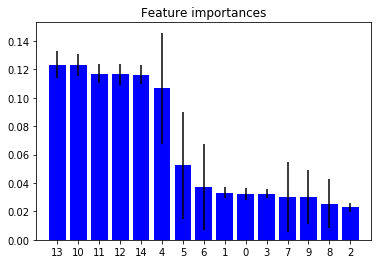

In [32]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], features.columns[indices[f]], importancesRF[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importancesRF[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()